In [12]:
import pandas as pd 

In [13]:
import statsmodels.api as smf

In [14]:
import numpy as np 

In [15]:
import statsmodels.formula.api as sm

In [16]:
import seaborn as sb

In [17]:
import matplotlib.pyplot as plt

In [18]:
path = '/Users/ethanfreshman/Desktop/HousePrices2024.csv'
hp = pd.read_csv(path)
hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,9101,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,218458
1,2,20,RL,80.0,10385,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,188608
2,3,60,RL,68.0,11560,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,228892
3,4,70,RM,60.0,10137,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,143663
4,5,60,RL,84.0,14596,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,251908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7986,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,183986
1456,1457,20,RL,85.0,14091,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,218448
1457,1458,70,RL,66.0,9146,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,272795
1458,1459,20,RL,68.0,10408,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,144793


# Data Description 

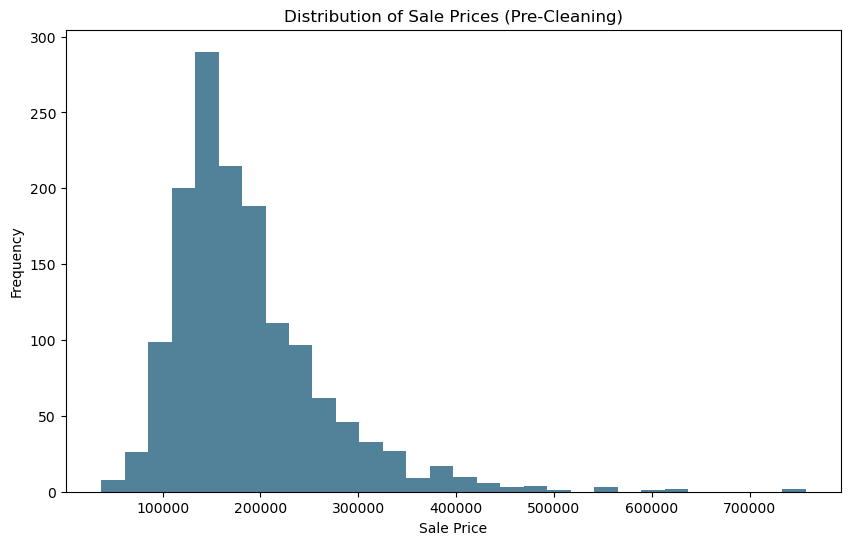

count      1460.000000
mean     186440.732192
std       79441.967590
min       37086.000000
25%      136062.000000
50%      167847.000000
75%      218529.750000
max      757425.000000
Name: SalePrice, dtype: float64

In [19]:
# Making data description of SalePrice 

summary_stats = hp['SalePrice'].describe()

plt.figure(figsize = (10, 6))
plt.hist(hp['SalePrice'], bins = 30, color = '#084d6f', alpha = 0.7)
plt.title('Distribution of Sale Prices (Pre-Cleaning)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

summary_stats

# Data Cleaning 
1) Removing variables with high percentage missing data 
2) Removing numerical variables with >90% zeroes in the data
3) Removig categorical variables with few observations in a category 
4) Removing rows with standard deviation above 3.5 from the mean 

In [20]:
# Finding for missing data and put them into a list
cols = hp.columns # Create varible with the list of columns
data_length = len(hp) # Length of the rows == 1460
Data_w_na = []

for element in cols:
    vars_dropna = len(hp[element].dropna()) #Drop NA in the columns
    if vars_dropna < data_length: # Check if the drop NA row is less than 1460 (full data)
        Missing_level = round(1 - (vars_dropna / data_length),5)*100
        Datablock = [element,Missing_level]
        Data_w_na.append(Datablock) # Appending element and misisng amount into a dataframe

Data_na_df = pd.DataFrame(Data_w_na, columns = ["Vars", "Missing_per"])
Data_na_df = Data_na_df.sort_values(by = "Missing_per", ascending = False)
Filter_Miss = Data_na_df["Missing_per"] > 5

Missing_data_list = Data_na_df.Vars # Create missing data list
Missing_data_list = Missing_data_list.reset_index().Vars

Missing_data_list

# 19 total variables 

# all these catagorical variables have mmissing data (NA)

0           PoolQC
1      MiscFeature
2            Alley
3            Fence
4       MasVnrType
5      FireplaceQu
6      LotFrontage
7       GarageType
8      GarageYrBlt
9     GarageFinish
10      GarageQual
11      GarageCond
12    BsmtFinType2
13    BsmtExposure
14    BsmtFinType1
15        BsmtCond
16        BsmtQual
17      MasVnrArea
18      Electrical
Name: Vars, dtype: object

In [21]:
del hp['PoolQC']
del hp['MiscFeature']
del hp['Fence']
del hp['MasVnrType']
del hp['FireplaceQu']
del hp['LotFrontage']
del hp['GarageType']
del hp['GarageYrBlt']
del hp['GarageFinish']
del hp['GarageQual']
del hp['GarageCond']
del hp['BsmtFinType2']
del hp['BsmtExposure']
del hp['BsmtFinType1']
del hp['BsmtCond']
del hp['BsmtQual']
del hp['MasVnrArea']
del hp['Electrical']
#del hp['Id'] # Deleted Id because its not useful. 

# deleted variables with lots of NA 

In [22]:
hp

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,9101,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,218458
1,2,20,RL,10385,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,188608
2,3,60,RL,11560,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,228892
3,4,70,RM,10137,Pave,NaN,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,143663
4,5,60,RL,14596,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,251908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7986,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,183986
1456,1457,20,RL,14091,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,218448
1457,1458,70,RL,9146,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,272795
1458,1459,20,RL,10408,Pave,NaN,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,144793


In [23]:
# Cleaning Variables with > 90% zeroes as entries

numerical_columns = [col for col in hp.columns if hp[col].dtype in ['int64', 'float64']]

def zero_filter(hp):
    columns_to_keep = []
    for col in numerical_columns: 
        zeros = (hp[col] == 0).sum()
        zero_ratio = zeros / len(hp[col])
        if zero_ratio <= 0.1: 
            columns_to_keep.append(col)
            
    return columns_to_keep

new_numericals = zero_filter(hp)

print(numerical_columns)
print(new_numericals)
print(len(numerical_columns))
print(len(new_numericals))

vars_to_delete = ['BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

print(vars_to_delete)

for x in vars_to_delete:
    del hp[x]
    
hp

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice']
35
20
['BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,TotRmsAbvGrd,Functional,GarageCars,GarageArea,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,9101,Pave,NaN,Reg,Lvl,AllPub,Inside,...,8,Typ,2,548,Y,2,2008,WD,Normal,218458
1,2,20,RL,10385,Pave,NaN,Reg,Lvl,AllPub,FR2,...,6,Typ,2,460,Y,5,2007,WD,Normal,188608
2,3,60,RL,11560,Pave,NaN,IR1,Lvl,AllPub,Inside,...,6,Typ,2,608,Y,9,2008,WD,Normal,228892
3,4,70,RM,10137,Pave,NaN,IR1,Lvl,AllPub,Corner,...,7,Typ,3,642,Y,2,2006,WD,Abnorml,143663
4,5,60,RL,14596,Pave,NaN,Reg,Lvl,AllPub,FR2,...,9,Typ,3,836,Y,12,2008,WD,Normal,251908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7986,Pave,NaN,Reg,Lvl,AllPub,Inside,...,7,Typ,2,460,Y,8,2007,WD,Normal,183986
1456,1457,20,RL,14091,Pave,NaN,Reg,Lvl,AllPub,Inside,...,7,Min1,2,500,Y,2,2010,WD,Normal,218448
1457,1458,70,RL,9146,Pave,NaN,Reg,Lvl,AllPub,Inside,...,9,Typ,1,252,Y,5,2010,WD,Normal,272795
1458,1459,20,RL,10408,Pave,NaN,Reg,Lvl,AllPub,Inside,...,5,Typ,1,240,Y,4,2010,WD,Normal,144793


In [24]:
hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageCars', 'GarageArea', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [25]:
# Further cleaning categoricals with few observations per category 



In [26]:
# trying to take out rows with zcore (STD) over 3


Zdev_limit = 3.5

cleanable_list = ['LotArea', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', '1stFlrSF', 'OverallQual', 'OverallCond'] 

temp_house = hp

for element in cleanable_list:
    mean = temp_house[element].mean()
    std = temp_house[element].std()
    upper_bound = mean + (std * Zdev_limit) # Calculate upper bound for data cleaning
    lower_bound = mean - (std * Zdev_limit) # Calculate lower bound for data cleaning

    upper_filter = temp_house[element] < upper_bound # Setting the upper bound filter to data
    lower_filter = temp_house[element] > lower_bound # Setting the lower bound filter to data
    temp_house = temp_house[upper_filter & lower_filter] # applying filter by removing row

print(len(hp), len(temp_house), round(len(temp_house)/len(hp),3))

1460 1353 0.927


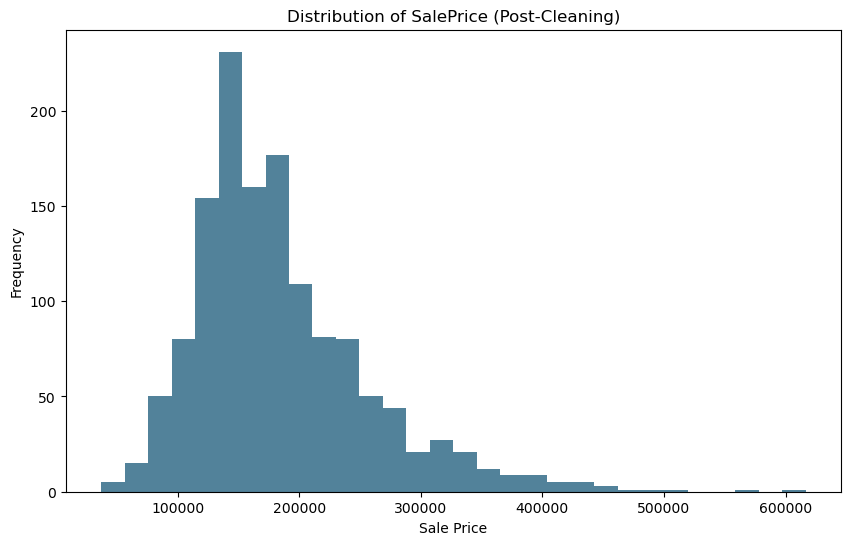

count      1353.000000
mean     184754.962306
std       72263.401937
min       37086.000000
25%      136530.000000
50%      169914.000000
75%      218458.000000
max      616484.000000
Name: SalePrice, dtype: float64

In [27]:
# New sales price distribution after data cleaning


summary_stats = temp_house['SalePrice'].describe()

plt.figure(figsize = (10, 6))
plt.hist(temp_house['SalePrice'], bins = 30, color = '#084d6f', alpha = 0.7)
plt.title('Distribution of SalePrice (Post-Cleaning)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

summary_stats

# Causal Analysis 
1) Univariate regression with Lot Area 
2) Multivariate regression with confounding factors to Lot Area 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sat, 04 May 2024   Prob (F-statistic):           6.77e-25
Time:                        17:06:52   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.632e+05   2988.927     54.594      0.0

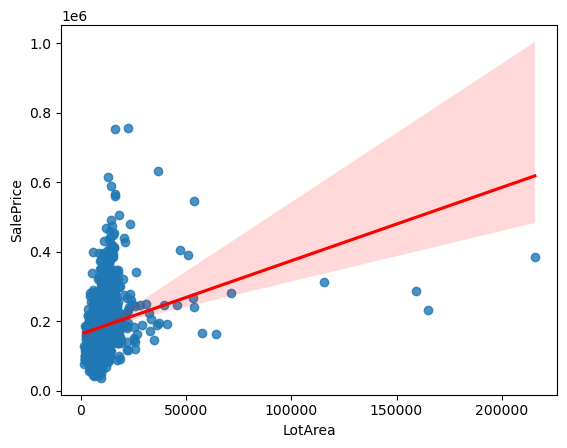

In [28]:
# Pre data-cleaning lot area distribution and regression 

sb.regplot(data = hp, x="LotArea", y="SalePrice", line_kws=dict(color="r"))

reg_main = sm.ols('SalePrice ~ LotArea', hp).fit()
print(reg_main.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.52e-42
Time:                        17:06:53   Log-Likelihood:                -16963.
No. Observations:                1353   AIC:                         3.393e+04
Df Residuals:                    1351   BIC:                         3.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.227e+05   4748.461     25.847      0.0

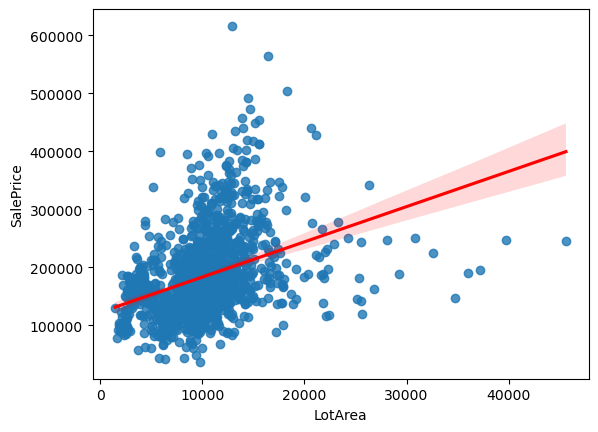

In [29]:
# New Univariate Model post-data cleaning

sb.regplot(data=temp_house, x="LotArea", y="SalePrice", line_kws=dict(color="r"))

reg_new = sm.ols('SalePrice ~ LotArea', temp_house).fit()
print(reg_new.summary())

In [30]:
potential_confounders = temp_house.columns.drop(['SalePrice', 'LotArea'])
print(potential_confounders)

# - '1stFlrSF' because python errors numerical names we have to change the name to FirstFlrSF or smtg

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageCars', 'GarageArea',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')


In [31]:
# Checking to see how to check for p values in categorical.

model_YZ = sm.ols(f"SalePrice ~ Neighborhood", temp_house).fit()
model_XZ = sm.ols(f"LotArea ~ Neighborhood", temp_house).fit()

print(model_YZ.summary())
print(model_XZ.summary())
model_YZ.pvalues[0] < 0.05

# We can see that each dummy has a structure of z_var[T.x]
# For numerical, it would just be the z_var 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     69.89
Date:                Sat, 04 May 2024   Prob (F-statistic):          1.53e-215
Time:                        17:06:53   Log-Likelihood:                -16504.
No. Observations:                1353   AIC:                         3.306e+04
Df Residuals:                    1328   BIC:                         3.319e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

True

In [32]:
# The function only works for numerical variables, so we need to make a seperate function for the categorical 
# variables in the dataset. 

potential_confounders = temp_house.columns.drop(['SalePrice', 'LotArea', '1stFlrSF'])

def identify_confounder_new(z_vars):
    results = {
        'Confounder': [],
        'Significant with Y': [],
        'Significant with X': [],
        'Is Confounder': [],
    }

    for z_var in z_vars:
        model_YZ = sm.ols(f"SalePrice ~ {z_var}", temp_house).fit()
        model_XZ = sm.ols(f"LotArea ~ {z_var}", temp_house).fit()
        
        significantY = False # Tracker variables that keeps track through the loop 
        
        for dummy, p_val in model_YZ.pvalues.items(): # After heavy experimenting, we have to use a tuple and iterate the .items() to access tell python to only check the p-values and not the name of the dummy too.
            if p_val < 0.05:
                significantY = True
                break
        
        significantX = False  
        
        for dummy, p_val in model_XZ.pvalues.items():
            if p_val < 0.05:
                significantX = True
                break

        is_confounder = significantY == True and significantX == True

        if is_confounder == True:
            results['Confounder'].append(z_var)
            results['Significant with Y'].append(significantY)
            results['Significant with X'].append(significantX)
            results['Is Confounder'].append(is_confounder)

    results = pd.DataFrame(results)
    return results

cfs = identify_confounder_new(potential_confounders)
cfs

,Confounder,Significant with Y,Significant with X,Is Confounder
0,Id,True,True,True
1,MSSubClass,True,True,True
2,MSZoning,True,True,True
3,Street,True,True,True
4,Alley,True,True,True
5,LotShape,True,True,True
6,LandContour,True,True,True
7,Utilities,True,True,True
8,LotConfig,True,True,True
9,LandSlope,True,True,True


In [33]:
# Checking for OVB with potential confounders. 

def test_ovb(independent_var, dependent_var):
    initial_model = sm.ols('SalePrice ~ LotArea', temp_house).fit()

    potential_confounders = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageCars', 'GarageArea', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

    results_list = {
        'Confounder': [],
        'Original Coefficient': [],
        'New Coefficient': [],
        'Percent Change': [],
    }

    for confounder in potential_confounders:
        model = sm.ols(f'SalePrice ~ LotArea + {confounder}', temp_house).fit()
        
        original_coef = initial_model.params[independent_var]
        new_coef = model.params[independent_var]
        
        if abs(new_coef - original_coef) / original_coef < 0.1: 
            results_list['Confounder'].append(confounder)
            results_list['Original Coefficient'].append(original_coef)
            results_list['New Coefficient'].append(new_coef)
            results_list['Percent Change'].append((new_coef - original_coef) / original_coef * 100)

    results = pd.DataFrame(results_list)
    return results

ovb = test_ovb('LotArea', 'SalePrice')
ovb

,Confounder,Original Coefficient,New Coefficient,Percent Change
0,Street,6.072506,6.176533,1.713095e+00
1,LandContour,6.072506,6.075811,5.442532e-02
2,Utilities,6.072506,6.085199,2.090310e-01
3,LotConfig,6.072506,5.943644,-2.122054e+00
4,LandSlope,6.072506,6.358523,4.710036e+00
5,Condition1,6.072506,6.137743,1.074309e+00
6,Condition2,6.072506,6.025383,-7.759983e-01
7,HouseStyle,6.072506,5.833846,-3.930164e+00
8,OverallQual,6.072506,6.068014,-7.396957e-02
9,OverallCond,6.072506,6.072825,5.266520e-03


In [34]:
cfs_conf = cfs['Confounder']
ovb_conf = ovb['Confounder']

print(cfs_conf, ovb_conf)

# The common variables are the variables we use for our multivariate regression model for Lot Area
ovb_confounders = ['MSSubClass', 'Alley', 'LotShape', 'Neighborhood', 'BldgType', 'ExterQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

0                Id
1        MSSubClass
2          MSZoning
3            Street
4             Alley
5          LotShape
6       LandContour
7         Utilities
8         LotConfig
9         LandSlope
10     Neighborhood
11       Condition1
12       Condition2
13         BldgType
14       HouseStyle
15      OverallQual
16      OverallCond
17        RoofStyle
18         RoofMatl
19      Exterior1st
20      Exterior2nd
21        ExterQual
22        ExterCond
23       Foundation
24        BsmtUnfSF
25      TotalBsmtSF
26        HeatingQC
27       CentralAir
28        GrLivArea
29         FullBath
30     BedroomAbvGr
31     KitchenAbvGr
32      KitchenQual
33     TotRmsAbvGrd
34       Functional
35       GarageCars
36       GarageArea
37       PavedDrive
38           MoSold
39         SaleType
40    SaleCondition
Name: Confounder, dtype: object 0            Street
1       LandContour
2         Utilities
3         LotConfig
4         LandSlope
5        Condition1
6        Condition2
7       

In [35]:
reg_multi = sm.ols('SalePrice ~ LotArea + LandContour + Utilities + LotConfig + LandSlope + Condition1 + Condition2 + HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + ExterCond + Foundation + BsmtUnfSF + Heating + HeatingQC + CentralAir + BedroomAbvGr + KitchenAbvGr + Functional + PavedDrive + MoSold + YrSold + SaleType + SaleCondition', temp_house).fit()
reg_multi.summary()

# R-Square = 0.669 
# Adj. R-Squared = 0.639 (495.35% Increase from univariate)
# Lot Area coef did not change much: 5.1830 (14.64% Decrease from univariate)
# There is atleast 1 variable with p-values less than 0.05, meaning it is statistically significant 

# However, this model is not good as it is prone to overfitting due to the amount of variables that are present. 
# in the model. Although relatively accurate, this model is not a good predictor due to this fact alone, as it 
# is not applicable to every dataset as it has some variables unique to this dataset, such as Condition1. 

# Thus, if we want to make the most accurate model we can have, we need to make a new model using a different 
# method other than univariate and multivariate testing. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     22.15
Date:                Sat, 04 May 2024   Prob (F-statistic):          9.76e-226
Time:                        17:06:53   Log-Likelihood:                -16309.
No. Observations:                1353   AIC:                         3.285e+04
Df Residuals:                    1239   BIC:                         3.344e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -1.73e+06   9.56e+05     -1.809      0.071   -3.61e+06    1.46e+05
LandContour[T.HLS]        9837.5382   9721.787      1.012      0.312   -9235.446    2.89e+04
LandContour[T.Low]       -7264.2903   1.27e+04     -0.572      0.568   -3.22e+04    1.77e+04
LandContour[T.Lvl]        -319.1434   7098.276     -0.045      0.964   -1.42e+04    1.36e+04
Utilities[T.NoSeWa]      -6952.4901   4.51e+04     -0.154      0.878   -9.54e+04    8.15e+04
LotConfig[T.CulDSac]      4692.7999   5889.363      0.797      0.426   -6861.426    1.62e+04
LotConfig[T.FR2]         -2.381e+04   7410.062     -3.213      0.001   -3.83e+04   -9271.818
LotConfig[T.FR3]         -1.345e+04   2.31e+04     -0.583      0.560   -5.87e+04    3.18e+04
LotConfig[T.Inside]      -3527.5508   3309.897     -1.066      0.287      -1e+04    2966.071
LandSlope[T.Mod]          1.344e+04   7360.159      1.826      0.068   -1003.721    2.79e+04
LandSlope[T.Sev]         -6.887e+04   2.57e+04     -2.677      0.008   -1.19e+05   -1.84e+04
Condition1[T.Feedr]       7215.5469   9346.619      0.772      0.440   -1.11e+04    2.56e+04
Condition1[T.Norm]        1.398e+04   7629.719      1.832      0.067    -987.999    2.89e+04
Condition1[T.PosA]        2.926e+04   1.84e+04      1.592      0.112   -6792.452    6.53e+04
Condition1[T.PosN]        2.831e+04   1.37e+04      2.068      0.039    1452.483    5.52e+04
Condition1[T.RRAe]       -4.036e+04   1.76e+04     -2.288      0.022    -7.5e+04   -5748.097
Condition1[T.RRAn]       -1.122e+04   1.22e+04     -0.916      0.360   -3.52e+04    1.28e+04
Condition1[T.RRNe]       -2.083e+04   3.21e+04     -0.648      0.517   -8.39e+04    4.22e+04
Condition1[T.RRNn]        2.217e+04   2.24e+04      0.991      0.322   -2.17e+04    6.61e+04
Condition2[T.Norm]        -1.74e+04   2.11e+04     -0.824      0.410   -5.88e+04     2.4e+04
Condition2[T.PosA]        1.943e+05   6.15e+04      3.161      0.002    7.37e+04    3.15e+05
Condition2[T.RRNn]       -1.576e+04   3.84e+04     -0.410      0.682   -9.12e+04    5.96e+04
HouseStyle[T.1.5Unf]     -6001.5786   1.37e+04     -0.438      0.661   -3.29e+04    2.09e+04
HouseStyle[T.1Story]     -2.121e+04   5098.278     -4.161      0.000   -3.12e+04   -1.12e+04
HouseStyle[T.2.5Fin]      4432.7905   2.33e+04      0.190      0.849   -4.13e+04    5.02e+04
HouseStyle[T.2.5Unf]      1.549e+04   1.85e+04      0.836      0.403   -2.09e+04    5.18e+04
HouseStyle[T.2Story]     -2901.0299   5361.490     -0.541      0.589   -1.34e+04    7617.572
HouseStyle[T.SFoyer]     -3.705e+04   9567.412     -3.873      0.000   -5.58e+04   -1.83e+04
HouseStyle[T.SLvl]        -2.32e+04   7619.124     -3.045      0.002   -3.81e+04   -8248.670
RoofStyle[T.Gable]       -2.648e+04   3.31e+04     -0.799      0.424   -9.15e+04    3.85e+04
RoofStyle[T.Ga

# Predicting 
1) Finding variables with the highest adjusted R^2 value to SalePrice AND statistically significant. 
2) Using forward regression to make a model. 
3) Using backward regression to make a model. 
4) Comparing the four models we made to find the best predictor for SalePrice (Univariate, Multivariate, Forward, Backward) 

In [36]:
# Extracting the necessary values from the dataset to compare

test_vars = temp_house.columns.drop(['SalePrice', '1stFlrSF'])

def extract_results(test_vars):
    results = {
        'Variable': [],
        'Coefficient': [],
        'Pvalue': [],
        'StandardError': [],
        'Rsquared': [],
        'AdjRsquared': [],
    }
    
    for test in test_vars:
        model = sm.ols(f"SalePrice ~ {test}", temp_house).fit()
        
        for j in model.params.index[1:]:  
            results['Variable'].append(test)
            results['Coefficient'].append(model.params[j])
            results['Pvalue'].append(model.pvalues[j])
            results['StandardError'].append(model.bse[j])
            results['Rsquared'].append(model.rsquared)
            results['AdjRsquared'].append(model.rsquared_adj)

    return pd.DataFrame(results)

raw = extract_results(test_vars)
raw

,Variable,Coefficient,Pvalue,StandardError,Rsquared,AdjRsquared
0,Id,-4.233224,3.645334e-01,4.666939,0.000609,-0.000131
1,MSSubClass,-70.867353,1.489085e-01,49.069583,0.001541,0.000802
2,MSZoning,145412.259058,1.041938e-08,25246.105417,0.127604,0.125016
3,MSZoning,56313.625000,6.818883e-02,30853.039054,0.127604,0.125016
4,MSZoning,122059.713360,4.124458e-07,23988.590716,0.127604,0.125016
...,...,...,...,...,...,...
161,SaleCondition,-34246.994624,4.665487e-01,47022.369830,0.174052,0.170987
162,SaleCondition,52250.305376,8.388996e-02,30205.480152,0.174052,0.170987
163,SaleCondition,5963.505376,7.311895e-01,17355.198687,0.174052,0.170987
164,SaleCondition,33886.418537,2.022641e-06,7101.070210,0.174052,0.170987


In [37]:
raw.sort_values(by = 'AdjRsquared', ascending = False)

,Variable,Coefficient,Pvalue,StandardError,Rsquared,AdjRsquared
133,GrLivArea,114.630095,9.156245e-241,2.784286,0.556467,0.556139
32,Neighborhood,-40118.641320,4.177589e-03,13981.529666,0.558126,0.550140
30,Neighborhood,-92835.499160,1.296882e-10,14328.484880,0.558126,0.550140
23,Neighborhood,-90812.658088,8.833279e-08,16882.221681,0.558126,0.550140
24,Neighborhood,-69990.277606,2.015061e-07,13394.023363,0.558126,0.550140
...,...,...,...,...,...,...
80,RoofMatl,-12501.106129,8.628950e-01,72376.538657,0.001323,-0.002385
79,RoofMatl,40956.560538,3.275559e-01,41817.809761,0.001323,-0.002385
78,RoofMatl,4256.449427,8.603953e-01,24197.475798,0.001323,-0.002385
77,RoofMatl,2921.893871,9.678035e-01,72376.538657,0.001323,-0.002385


In [38]:
summary_stats = raw['AdjRsquared'].describe()
summary_stats

# We make a filter for the Adj-R^Squareds that are at the top 75 percentile 

count    166.000000
mean       0.189595
std        0.191259
min       -0.002385
25%        0.025755
50%        0.169168
75%        0.281305
max        0.556139
Name: AdjRsquared, dtype: float64

In [39]:
strong_vars = raw['AdjRsquared'] > 0.281969 # top 75 percentile
raw[strong_vars].sort_values(by = 'AdjRsquared', ascending = False)

,Variable,Coefficient,Pvalue,StandardError,Rsquared,AdjRsquared
133,GrLivArea,114.630095,9.156245e-241,2.784286,0.556467,0.556139
22,Neighborhood,-56394.970588,1.198302e-01,36232.176455,0.558126,0.550140
35,Neighborhood,-6780.354646,6.054876e-01,13123.730407,0.558126,0.550140
45,Neighborhood,29207.329412,1.307491e-01,19315.880155,0.558126,0.550140
44,Neighborhood,44499.294118,2.037502e-03,14397.207024,0.558126,0.550140
23,Neighborhood,-90812.658088,8.833279e-08,16882.221681,0.558126,0.550140
42,Neighborhood,29900.715458,2.026326e-02,12864.769427,0.558126,0.550140
41,Neighborhood,-3188.285403,8.130554e-01,13479.224745,0.558126,0.550140
40,Neighborhood,-57449.381036,1.371902e-05,13162.393244,0.558126,0.550140
39,Neighborhood,-57493.518207,2.876751e-04,15813.018209,0.558126,0.550140


In [40]:
# Forward Testing: Testing until the adj r^2 does not increase anymore 

In [41]:
model = sm.ols('SalePrice ~ GrLivArea', temp_house).fit()
model.rsquared_adj

0.556139169796283

In [42]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood', temp_house).fit()
model.rsquared_adj

0.7638392241678094

In [43]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual', temp_house).fit()
model.rsquared_adj

0.8041773385946951

In [44]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars', temp_house).fit()
model.rsquared_adj

0.8232370511802954

In [45]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual', temp_house).fit()
model.rsquared_adj

0.8390433102859565

In [46]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea', temp_house).fit()
model.rsquared_adj

0.8432689327830981

In [47]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea + TotalBsmtSF', temp_house).fit()
model.rsquared_adj

0.8664723385434719

In [48]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd', temp_house).fit()
model.rsquared_adj

# Not that high of an increase

0.8667171315260445

In [49]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + FullBath', temp_house).fit()
model.rsquared_adj
# Decrease

0.8667031940021912

In [50]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + YearBuilt', temp_house).fit()
model.rsquared_adj
# Incrase a bit again

0.8720120503854747

In [51]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + YearBuilt + Foundation', temp_house).fit()
model.rsquared_adj
# but it still increased 

0.8721172762492149

In [52]:
# Final Forward Model
fwd_model =  sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + YearBuilt + Foundation', temp_house).fit()
fwd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     225.9
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        17:06:54   Log-Likelihood:                -15645.
No. Observations:                1353   AIC:                         3.137e+04
Df Residuals:                    1311   BIC:                         3.159e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6.524e+05   1.23e+05     -5.316      0.000   -8.93e+05   -4.12e+05
Neighborhood[T.Blueste]     3.2577   1.96e+04      0.000      1.000   -3.85e+04    3.85e+04
Neighborhood[T.BrDale]  -7502.1823   9622.059     -0.780      0.436   -2.64e+04    1.14e+04
Neighborhood[T.BrkSide]  2.012e+04   8287.988      2.428      0.015    3862.438    3.64e+04
Neighborhood[T.ClearCr]  1.787e+04   8927.522      2.001      0.046     352.216    3.54e+04
Neighborhood[T.CollgCr]  1.089e+04   6756.417      1.612      0.107   -2362.733    2.41e+04
Neighborhood[T.Crawfor]  4.635e+04   8159.718      5.680      0.000    3.03e+04    6.24e+04
Neighborhood[T.Edwards]  1630.9905   7550.777      0.216      0.829   -1.32e+04    1.64e+04
Neighborhood[T.Gilbert]  1.235e+04   7120.991      1.735      0.083   -1615.406    2.63e+04
Neighborhood[T.IDOTRR]   1917.9411   8850.839      0.217      0.828   -1.54e+04    1.93e+04
Neighborhood[T.MeadowV] -1.002e+04   9480.897     -1.057      0.291   -2.86e+04    8580.535
Neighborhood[T.Mitchel]  7958.8912   7840.936      1.015      0.310   -7423.262    2.33e+04
Neighborhood[T.NAmes]    5659.1202   7296.679      0.776      0.438   -8655.323       2e+04
Neighborhood[T.NPkVill]  -903.5496   1.11e+04     -0.082      0.935   -2.26e+04    2.08e+04
Neighborhood[T.NWAmes]   4394.8373   7581.665      0.580      0.562   -1.05e+04    1.93e+04
Neighborhood[T.NoRidge]  4.207e+04   7952.177      5.290      0.000    2.65e+04    5.77e+04
Neighborhood[T.NridgHt]  3.854e+04   7293.990      5.283      0.000    2.42e+04    5.28e+04
Neighborhood[T.OldTown]  4839.5572   8112.854      0.597      0.551   -1.11e+04    2.08e+04
Neighborhood[T.SWISU]    2841.9299   9550.147      0.298      0.766   -1.59e+04    2.16e+04
Neighborhood[T.Sawyer]   7032.9507   7693.101      0.914      0.361   -8059.183    2.21e+04
Neighborhood[T.SawyerW]  9554.6661   7373.778      1.296      0.195   -4911.028     2.4e+04
Neighborhood[T.Somerst]  1.906e+04   7024.167      2.713      0.007    5276.748    3.28e+04
Neighborhood[T.StoneBr]  5.867e+04   8411.924      6.975      0.000    4.22e+04    7.52e+04
Neighborhood[T.Timber]   2.305e+04   7819.527      2.947      0.003    7706.030    3.84e+04
Neighborhood[T.Veenker]  3.634e+04   1.05e+04      3.471      0.001    1.58e+04    5.69e+04
ExterQual[T.Fa]         -6.225e+04   1.08e+04     -5.779      0.000   -8.34e+04   -4.11e+04
ExterQual[T.Gd]         -4.602e+04   4979.103     -9.243      0.000   -5.58e+04   -3.63e+04
ExterQual[T.TA]         -4.982e+04   5465.726     -9.116      0.000   -6.05e+04   -3.91e+04
KitchenQual[T.Fa]       -4.755e+04   6375.657     -7.459      0.000   -6.01e+04    -3.5e+04
KitchenQual[T.Gd]        -3.44e+04   3620.825     -9.500      0.000   -4.15e+04   -2.73e+04
KitchenQual[T.TA]       -4.229e+04   4023.390  

In [53]:
# Backward Testing: Removing variables with the highest p-value until all the p-values are < 0.05 

In [54]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + GarageCars + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + YearBuilt + Foundation', temp_house).fit()
model.summary()

# P-Values above 0.05 / Not atleast one < 0.05 for categoricals: Foundation & GarageCars

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     225.9
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        17:06:54   Log-Likelihood:                -15645.
No. Observations:                1353   AIC:                         3.137e+04
Df Residuals:                    1311   BIC:                         3.159e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6.524e+05   1.23e+05     -5.316      0.000   -8.93e+05   -4.12e+05
Neighborhood[T.Blueste]     3.2577   1.96e+04      0.000      1.000   -3.85e+04    3.85e+04
Neighborhood[T.BrDale]  -7502.1823   9622.059     -0.780      0.436   -2.64e+04    1.14e+04
Neighborhood[T.BrkSide]  2.012e+04   8287.988      2.428      0.015    3862.438    3.64e+04
Neighborhood[T.ClearCr]  1.787e+04   8927.522      2.001      0.046     352.216    3.54e+04
Neighborhood[T.CollgCr]  1.089e+04   6756.417      1.612      0.107   -2362.733    2.41e+04
Neighborhood[T.Crawfor]  4.635e+04   8159.718      5.680      0.000    3.03e+04    6.24e+04
Neighborhood[T.Edwards]  1630.9905   7550.777      0.216      0.829   -1.32e+04    1.64e+04
Neighborhood[T.Gilbert]  1.235e+04   7120.991      1.735      0.083   -1615.406    2.63e+04
Neighborhood[T.IDOTRR]   1917.9411   8850.839      0.217      0.828   -1.54e+04    1.93e+04
Neighborhood[T.MeadowV] -1.002e+04   9480.897     -1.057      0.291   -2.86e+04    8580.535
Neighborhood[T.Mitchel]  7958.8912   7840.936      1.015      0.310   -7423.262    2.33e+04
Neighborhood[T.NAmes]    5659.1202   7296.679      0.776      0.438   -8655.323       2e+04
Neighborhood[T.NPkVill]  -903.5496   1.11e+04     -0.082      0.935   -2.26e+04    2.08e+04
Neighborhood[T.NWAmes]   4394.8373   7581.665      0.580      0.562   -1.05e+04    1.93e+04
Neighborhood[T.NoRidge]  4.207e+04   7952.177      5.290      0.000    2.65e+04    5.77e+04
Neighborhood[T.NridgHt]  3.854e+04   7293.990      5.283      0.000    2.42e+04    5.28e+04
Neighborhood[T.OldTown]  4839.5572   8112.854      0.597      0.551   -1.11e+04    2.08e+04
Neighborhood[T.SWISU]    2841.9299   9550.147      0.298      0.766   -1.59e+04    2.16e+04
Neighborhood[T.Sawyer]   7032.9507   7693.101      0.914      0.361   -8059.183    2.21e+04
Neighborhood[T.SawyerW]  9554.6661   7373.778      1.296      0.195   -4911.028     2.4e+04
Neighborhood[T.Somerst]  1.906e+04   7024.167      2.713      0.007    5276.748    3.28e+04
Neighborhood[T.StoneBr]  5.867e+04   8411.924      6.975      0.000    4.22e+04    7.52e+04
Neighborhood[T.Timber]   2.305e+04   7819.527      2.947      0.003    7706.030    3.84e+04
Neighborhood[T.Veenker]  3.634e+04   1.05e+04      3.471      0.001    1.58e+04    5.69e+04
ExterQual[T.Fa]         -6.225e+04   1.08e+04     -5.779      0.000   -8.34e+04   -4.11e+04
ExterQual[T.Gd]         -4.602e+04   4979.103     -9.243      0.000   -5.58e+04   -3.63e+04
ExterQual[T.TA]         -4.982e+04   5465.726     -9.116      0.000   -6.05e+04   -3.91e+04
KitchenQual[T.Fa]       -4.755e+04   6375.657     -7.459      0.000   -6.01e+04    -3.5e+04
KitchenQual[T.Gd]        -3.44e+04   3620.825     -9.500      0.000   -4.15e+04   -2.73e+04
KitchenQual[T.TA]       -4.229e+04   4023.390  

In [55]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + YearBuilt', temp_house).fit()
model.summary()

# Next most insignificant: TotRmsAbvGrd 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     264.2
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        17:06:54   Log-Likelihood:                -15648.
No. Observations:                1353   AIC:                         3.137e+04
Df Residuals:                    1317   BIC:                         3.156e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7.304e+05   1.11e+05     -6.573      0.000   -9.48e+05   -5.12e+05
Neighborhood[T.Blueste]  -638.5067   1.96e+04     -0.033      0.974    -3.9e+04    3.77e+04
Neighborhood[T.BrDale]  -8632.6909   9451.352     -0.913      0.361   -2.72e+04    9908.658
Neighborhood[T.BrkSide]  1.846e+04   8233.719      2.242      0.025    2308.867    3.46e+04
Neighborhood[T.ClearCr]  1.757e+04   8844.939      1.986      0.047     215.707    3.49e+04
Neighborhood[T.CollgCr]  9795.7709   6674.853      1.468      0.142   -3298.734    2.29e+04
Neighborhood[T.Crawfor]  4.555e+04   8123.852      5.607      0.000    2.96e+04    6.15e+04
Neighborhood[T.Edwards]  1391.4079   7462.223      0.186      0.852   -1.32e+04     1.6e+04
Neighborhood[T.Gilbert]  1.173e+04   7109.414      1.650      0.099   -2216.445    2.57e+04
Neighborhood[T.IDOTRR]    993.4867   8754.448      0.113      0.910   -1.62e+04    1.82e+04
Neighborhood[T.MeadowV] -1.147e+04   9328.256     -1.230      0.219   -2.98e+04    6824.938
Neighborhood[T.Mitchel]  7209.2925   7773.470      0.927      0.354   -8040.443    2.25e+04
Neighborhood[T.NAmes]    5582.4044   7103.952      0.786      0.432   -8353.893    1.95e+04
Neighborhood[T.NPkVill]  -821.8970    1.1e+04     -0.075      0.940   -2.23e+04    2.07e+04
Neighborhood[T.NWAmes]   4019.6200   7407.639      0.543      0.587   -1.05e+04    1.86e+04
Neighborhood[T.NoRidge]  4.143e+04   7914.578      5.235      0.000    2.59e+04     5.7e+04
Neighborhood[T.NridgHt]  3.765e+04   7244.297      5.198      0.000    2.34e+04    5.19e+04
Neighborhood[T.OldTown]  3575.1160   8076.204      0.443      0.658   -1.23e+04    1.94e+04
Neighborhood[T.SWISU]     732.9925   9470.850      0.077      0.938   -1.78e+04    1.93e+04
Neighborhood[T.Sawyer]   6738.4583   7543.468      0.893      0.372   -8060.068    2.15e+04
Neighborhood[T.SawyerW]  8638.9877   7312.935      1.181      0.238   -5707.287     2.3e+04
Neighborhood[T.Somerst]  1.768e+04   6946.877      2.544      0.011    4048.051    3.13e+04
Neighborhood[T.StoneBr]  5.814e+04   8384.183      6.935      0.000    4.17e+04    7.46e+04
Neighborhood[T.Timber]   2.208e+04   7771.973      2.841      0.005    6831.313    3.73e+04
Neighborhood[T.Veenker]  3.606e+04   1.04e+04      3.458      0.001    1.56e+04    5.65e+04
ExterQual[T.Fa]         -6.113e+04   1.07e+04     -5.710      0.000   -8.21e+04   -4.01e+04
ExterQual[T.Gd]         -4.644e+04   4955.521     -9.372      0.000   -5.62e+04   -3.67e+04
ExterQual[T.TA]         -5.035e+04   5416.894     -9.294      0.000    -6.1e+04   -3.97e+04
KitchenQual[T.Fa]       -4.747e+04   6372.340     -7.449      0.000      -6e+04    -3.5e+04
KitchenQual[T.Gd]       -3.453e+04   3615.079     -9.550      0.000   -4.16e+04   -2.74e+04
KitchenQual[T.TA]       -4.259e+04   4004.736  

In [56]:
model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + YearBuilt', temp_house).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     264.2
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        17:06:54   Log-Likelihood:                -15648.
No. Observations:                1353   AIC:                         3.137e+04
Df Residuals:                    1317   BIC:                         3.156e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7.304e+05   1.11e+05     -6.573      0.000   -9.48e+05   -5.12e+05
Neighborhood[T.Blueste]  -638.5067   1.96e+04     -0.033      0.974    -3.9e+04    3.77e+04
Neighborhood[T.BrDale]  -8632.6909   9451.352     -0.913      0.361   -2.72e+04    9908.658
Neighborhood[T.BrkSide]  1.846e+04   8233.719      2.242      0.025    2308.867    3.46e+04
Neighborhood[T.ClearCr]  1.757e+04   8844.939      1.986      0.047     215.707    3.49e+04
Neighborhood[T.CollgCr]  9795.7709   6674.853      1.468      0.142   -3298.734    2.29e+04
Neighborhood[T.Crawfor]  4.555e+04   8123.852      5.607      0.000    2.96e+04    6.15e+04
Neighborhood[T.Edwards]  1391.4079   7462.223      0.186      0.852   -1.32e+04     1.6e+04
Neighborhood[T.Gilbert]  1.173e+04   7109.414      1.650      0.099   -2216.445    2.57e+04
Neighborhood[T.IDOTRR]    993.4867   8754.448      0.113      0.910   -1.62e+04    1.82e+04
Neighborhood[T.MeadowV] -1.147e+04   9328.256     -1.230      0.219   -2.98e+04    6824.938
Neighborhood[T.Mitchel]  7209.2925   7773.470      0.927      0.354   -8040.443    2.25e+04
Neighborhood[T.NAmes]    5582.4044   7103.952      0.786      0.432   -8353.893    1.95e+04
Neighborhood[T.NPkVill]  -821.8970    1.1e+04     -0.075      0.940   -2.23e+04    2.07e+04
Neighborhood[T.NWAmes]   4019.6200   7407.639      0.543      0.587   -1.05e+04    1.86e+04
Neighborhood[T.NoRidge]  4.143e+04   7914.578      5.235      0.000    2.59e+04     5.7e+04
Neighborhood[T.NridgHt]  3.765e+04   7244.297      5.198      0.000    2.34e+04    5.19e+04
Neighborhood[T.OldTown]  3575.1160   8076.204      0.443      0.658   -1.23e+04    1.94e+04
Neighborhood[T.SWISU]     732.9925   9470.850      0.077      0.938   -1.78e+04    1.93e+04
Neighborhood[T.Sawyer]   6738.4583   7543.468      0.893      0.372   -8060.068    2.15e+04
Neighborhood[T.SawyerW]  8638.9877   7312.935      1.181      0.238   -5707.287     2.3e+04
Neighborhood[T.Somerst]  1.768e+04   6946.877      2.544      0.011    4048.051    3.13e+04
Neighborhood[T.StoneBr]  5.814e+04   8384.183      6.935      0.000    4.17e+04    7.46e+04
Neighborhood[T.Timber]   2.208e+04   7771.973      2.841      0.005    6831.313    3.73e+04
Neighborhood[T.Veenker]  3.606e+04   1.04e+04      3.458      0.001    1.56e+04    5.65e+04
ExterQual[T.Fa]         -6.113e+04   1.07e+04     -5.710      0.000   -8.21e+04   -4.01e+04
ExterQual[T.Gd]         -4.644e+04   4955.521     -9.372      0.000   -5.62e+04   -3.67e+04
ExterQual[T.TA]         -5.035e+04   5416.894     -9.294      0.000    -6.1e+04   -3.97e+04
KitchenQual[T.Fa]       -4.747e+04   6372.340     -7.449      0.000      -6e+04    -3.5e+04
KitchenQual[T.Gd]       -3.453e+04   3615.079     -9.550      0.000   -4.16e+04   -2.74e+04
KitchenQual[T.TA]       -4.259e+04   4004.736  

In [57]:
bwd_model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + KitchenQual + GarageArea + TotalBsmtSF + TotRmsAbvGrd + YearBuilt', temp_house).fit()
bwd_model.summary()

# This might be better because there are less variables (no GarageCars) but the Adj R-Squared seems the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     264.2
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        17:06:54   Log-Likelihood:                -15648.
No. Observations:                1353   AIC:                         3.137e+04
Df Residuals:                    1317   BIC:                         3.156e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7.304e+05   1.11e+05     -6.573      0.000   -9.48e+05   -5.12e+05
Neighborhood[T.Blueste]  -638.5067   1.96e+04     -0.033      0.974    -3.9e+04    3.77e+04
Neighborhood[T.BrDale]  -8632.6909   9451.352     -0.913      0.361   -2.72e+04    9908.658
Neighborhood[T.BrkSide]  1.846e+04   8233.719      2.242      0.025    2308.867    3.46e+04
Neighborhood[T.ClearCr]  1.757e+04   8844.939      1.986      0.047     215.707    3.49e+04
Neighborhood[T.CollgCr]  9795.7709   6674.853      1.468      0.142   -3298.734    2.29e+04
Neighborhood[T.Crawfor]  4.555e+04   8123.852      5.607      0.000    2.96e+04    6.15e+04
Neighborhood[T.Edwards]  1391.4079   7462.223      0.186      0.852   -1.32e+04     1.6e+04
Neighborhood[T.Gilbert]  1.173e+04   7109.414      1.650      0.099   -2216.445    2.57e+04
Neighborhood[T.IDOTRR]    993.4867   8754.448      0.113      0.910   -1.62e+04    1.82e+04
Neighborhood[T.MeadowV] -1.147e+04   9328.256     -1.230      0.219   -2.98e+04    6824.938
Neighborhood[T.Mitchel]  7209.2925   7773.470      0.927      0.354   -8040.443    2.25e+04
Neighborhood[T.NAmes]    5582.4044   7103.952      0.786      0.432   -8353.893    1.95e+04
Neighborhood[T.NPkVill]  -821.8970    1.1e+04     -0.075      0.940   -2.23e+04    2.07e+04
Neighborhood[T.NWAmes]   4019.6200   7407.639      0.543      0.587   -1.05e+04    1.86e+04
Neighborhood[T.NoRidge]  4.143e+04   7914.578      5.235      0.000    2.59e+04     5.7e+04
Neighborhood[T.NridgHt]  3.765e+04   7244.297      5.198      0.000    2.34e+04    5.19e+04
Neighborhood[T.OldTown]  3575.1160   8076.204      0.443      0.658   -1.23e+04    1.94e+04
Neighborhood[T.SWISU]     732.9925   9470.850      0.077      0.938   -1.78e+04    1.93e+04
Neighborhood[T.Sawyer]   6738.4583   7543.468      0.893      0.372   -8060.068    2.15e+04
Neighborhood[T.SawyerW]  8638.9877   7312.935      1.181      0.238   -5707.287     2.3e+04
Neighborhood[T.Somerst]  1.768e+04   6946.877      2.544      0.011    4048.051    3.13e+04
Neighborhood[T.StoneBr]  5.814e+04   8384.183      6.935      0.000    4.17e+04    7.46e+04
Neighborhood[T.Timber]   2.208e+04   7771.973      2.841      0.005    6831.313    3.73e+04
Neighborhood[T.Veenker]  3.606e+04   1.04e+04      3.458      0.001    1.56e+04    5.65e+04
ExterQual[T.Fa]         -6.113e+04   1.07e+04     -5.710      0.000   -8.21e+04   -4.01e+04
ExterQual[T.Gd]         -4.644e+04   4955.521     -9.372      0.000   -5.62e+04   -3.67e+04
ExterQual[T.TA]         -5.035e+04   5416.894     -9.294      0.000    -6.1e+04   -3.97e+04
KitchenQual[T.Fa]       -4.747e+04   6372.340     -7.449      0.000      -6e+04    -3.5e+04
KitchenQual[T.Gd]       -3.453e+04   3615.079     -9.550      0.000   -4.16e+04   -2.74e+04
KitchenQual[T.TA]       -4.259e+04   4004.736  

In [58]:
# Comparing the four models: 

print(f'Univariate Model with LotArea Adj-Rsquared: {reg_new.rsquared_adj}')
print(f'Multivariate Model with LotArea Adj-Rsquared: {reg_multi.rsquared_adj}')
print(f'Forward Model Adj-Rsquared: {fwd_model.rsquared_adj}')
print(f'Backward Model Adj-Rsquared: {bwd_model.rsquared_adj}')

# In our case, the backward model is the best model to use. Although the forward model has a higher 
# adj-rsquared by .001 it has two extra variables that makes it more prone to errors and biases such
# as overfitting. Thus, we believe that our backward regression model is the best model to use. 

Univariate Model with LotArea Adj-Rsquared: 0.1285913725847888
Multivariate Model with LotArea Adj-Rsquared: 0.6387050240082695
Forward Model Adj-Rsquared: 0.8721172762492149
Backward Model Adj-Rsquared: 0.8720160671716535


# Application
1) Use model to predict the prices of the properties in the HousePrices_test2024.csv file. Aim to reach the best fit
2) Make a function that given the characteristics of a property and its current price returns an estimation for its sale price and an indication if the property is over-priced, under-priced or fairly-priced.

In [60]:
hpt = pd.read_csv('/Users/ethanfreshman/Desktop/HousePrices_test2024.csv')
hpt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
# Cleaning the new dataset again 
# Finding for missing data and put them into a list
cols = hpt.columns # Create varible with the list of columns
data_length = len(hpt) # Length of the rows == 1460
Data_w_na = []

for element in cols:
    vars_dropna = len(hpt[element].dropna()) #Drop NA in the columns
    if vars_dropna < data_length: # Check if the drop NA row is less than 1460 (full data)
        Missing_level = round(1 - (vars_dropna / data_length),5)*100
        Datablock = [element,Missing_level]
        Data_w_na.append(Datablock) # Appending element and misisng amount into a dataframe

Data_na_df = pd.DataFrame(Data_w_na, columns = ["Vars", "Missing_per"])
Data_na_df = Data_na_df.sort_values(by = "Missing_per", ascending = False)
Filter_Miss = Data_na_df["Missing_per"] > 5

Missing_data_list = Data_na_df.Vars # Create missing data list
Missing_data_list = Missing_data_list.reset_index().Vars

Missing_data_list

# A lot of the data we used for our final model in 

0           PoolQC
1      MiscFeature
2            Alley
3            Fence
4       MasVnrType
5      FireplaceQu
6      LotFrontage
7       GarageCond
8      GarageYrBlt
9       GarageQual
10    GarageFinish
11      GarageType
12        BsmtCond
13    BsmtExposure
14        BsmtQual
15    BsmtFinType1
16    BsmtFinType2
17      MasVnrArea
18        MSZoning
19    BsmtFullBath
20    BsmtHalfBath
21      Functional
22       Utilities
23      GarageCars
24      GarageArea
25     TotalBsmtSF
26     KitchenQual
27       BsmtUnfSF
28      BsmtFinSF2
29      BsmtFinSF1
30     Exterior2nd
31     Exterior1st
32        SaleType
Name: Vars, dtype: object

In [ ]:
vars_to_delete = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu",
    "LotFrontage", "GarageCond", "GarageYrBlt", "GarageQual", "GarageFinish",
    "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType1",
    "BsmtFinType2", "MasVnrArea", "MSZoning", "BsmtFullBath", "BsmtHalfBath",
    "Functional", "Utilities", "GarageCars", "GarageArea", "TotalBsmtSF",
    "KitchenQual", "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1", "Exterior2nd",
    "Exterior1st", "SaleType"
]

for x in vars_to_delete:
    del hpt[x]
    
#del hpt['Id']

In [ ]:
hpt.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [ ]:

numerical_columns = [col for col in hpt.columns if hpt[col].dtype in ['int64', 'float64']]

def zero_filter(hpt):
    columns_to_keep = []
    for col in numerical_columns: 
        zeros = (hpt[col] == 0).sum()
        zero_ratio = zeros / len(hpt[col])
        if zero_ratio >= 0.1: 
            columns_to_keep.append(col)
            
    return columns_to_keep

new_numericals = zero_filter(hpt)

print(new_numericals)

for x in new_numericals:
    del hpt[x]

['2ndFlrSF', 'LowQualFinSF', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [ ]:
hpt.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'PavedDrive', 'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [ ]:
# trying to take out rows with zcore (STD) over 3


Zdev_limit = 3.5

cleanable_list = ['LotArea', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', '1stFlrSF', 'OverallQual', 'OverallCond'] 

temp_house2 = hpt

for element in cleanable_list:
    mean = temp_house2[element].mean()
    std = temp_house2[element].std()
    upper_bound = mean + (std * Zdev_limit) # Calculate upper bound for data cleaning
    lower_bound = mean - (std * Zdev_limit) # Calculate lower bound for data cleaning

    upper_filter = temp_house2[element] < upper_bound # Setting the upper bound filter to data
    lower_filter = temp_house2[element] > lower_bound # Setting the lower bound filter to data
    temp_house2 = temp_house2[upper_filter & lower_filter] # applying filter by removing row

print(len(hp), len(temp_house2), round(len(temp_house2)/len(hp),3))

1460 1359 0.931


In [ ]:
temp_house2

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,PavedDrive,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,896,896,1,2,1,5,Y,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,1329,1329,1,3,1,6,Y,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,928,1629,2,3,1,6,Y,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,926,1604,2,3,1,7,Y,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,1280,1280,2,2,1,5,Y,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,546,1092,1,3,1,5,Y,6,2006,Normal
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,546,1092,1,3,1,6,Y,4,2006,Abnorml
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,1224,1224,1,4,1,7,Y,9,2006,Abnorml
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,970,970,1,3,1,6,Y,7,2006,Normal


In [ ]:
predictor_model = sm.ols('SalePrice ~ GrLivArea + Neighborhood + ExterQual + TotRmsAbvGrd + YearBuilt', temp_house).fit()
print(predictor_model.rsquared_adj)
newSalesPrice = predictor_model.predict(temp_house2)
temp_house2 = temp_house2.assign(SalesPrice = newSalesPrice)
temp_house2

0.8203253874536905


,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,PavedDrive,MoSold,YrSold,SaleCondition,SalesPrice
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,896,1,2,1,5,Y,6,2010,Normal,122071.929717
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,1329,1,3,1,6,Y,6,2010,Normal,153074.266349
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,1629,2,3,1,6,Y,3,2010,Normal,186602.848158
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,1604,2,3,1,7,Y,6,2010,Normal,186407.955539
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,1280,2,2,1,5,Y,1,2010,Normal,248992.451117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,1092,1,3,1,5,Y,6,2006,Normal,105534.682371
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,1092,1,3,1,6,Y,4,2006,Abnorml,106499.143960
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,1224,1,4,1,7,Y,9,2006,Abnorml,145231.774219
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,970,1,3,1,6,Y,7,2006,Normal,147675.401369


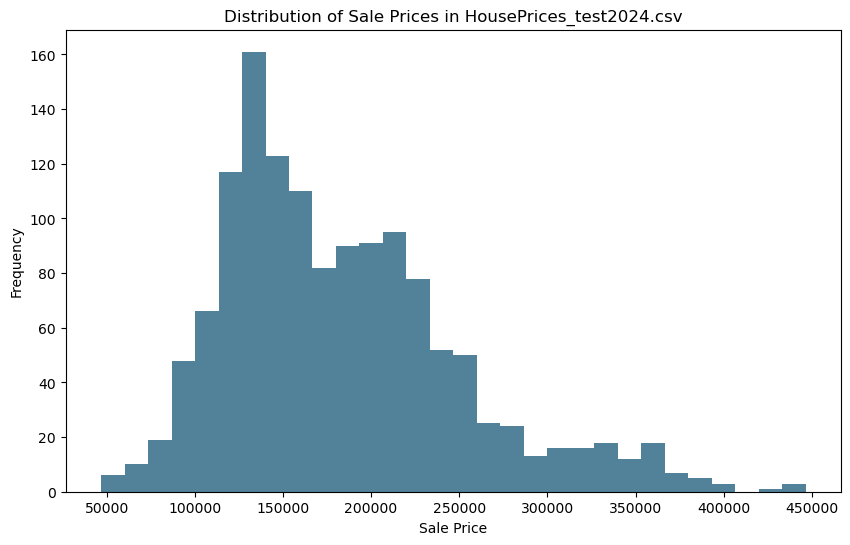

count      1359.000000
mean     183010.866506
std       67428.873907
min       46844.180131
25%      132533.161755
50%      169989.455019
75%      220282.059648
max      446505.339519
Name: SalesPrice, dtype: float64

In [ ]:
summary_stats = temp_house2['SalesPrice'].describe()

plt.figure(figsize = (10, 6))
plt.hist(temp_house2['SalesPrice'], bins = 30, color = '#084d6f', alpha = 0.7)
plt.title('Distribution of Sale Prices in HousePrices_test2024.csv')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

summary_stats